In [ ]:
#Objective: To provide insights for optimizing the portfolio, pricing, and channel performance.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Get data
url1 = "/content/drive/MyDrive/IBM Data Analyst/Project 1: Sales Performance Analysis/orders.csv"
url2 = "/content/drive/MyDrive/IBM Data Analyst/Project 1: Sales Performance Analysis/products.csv"
url3 = "/content/drive/MyDrive/IBM Data Analyst/Project 1: Sales Performance Analysis/customers.csv"

orders = pd.read_csv(url1)
products = pd.read_csv(url2)
customers = pd.read_csv(url3)
print("Orders: \n", orders.head())
print("Products: \n", products.head())
print("Customers: \n", customers.head())

Orders: 
    order_id  order_date  customer_id  product_id  price  quantity  channel
0      2001  2024-02-02          507        1008    126         1  Offline
1      2002  2024-05-21          503        1002    107         1  Offline
2      2003  2024-01-21          523        1012     75         2   Online
3      2004  2024-02-17          518        1013     88         3  Offline
4      2005  2024-05-27          538        1007     15         2  Offline
Products: 
    product_id product_name     category   brand  cost
0        1001    Product_1         Home  BrandB    51
1        1002    Product_2       Beauty  BrandA    66
2        1003    Product_3  Electronics  BrandB    55
3        1004    Product_4         Home  BrandB    59
4        1005    Product_5         Home  BrandB    68
Customers: 
    customer_id region gender  age
0          501   West   Male   29
1          502   West   Male   56
2          503   East   Male   19
3          504   West   Male   20
4          505   East

In [5]:
#understanding data
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     500 non-null    int64 
 1   order_date   500 non-null    object
 2   customer_id  500 non-null    int64 
 3   product_id   500 non-null    int64 
 4   price        500 non-null    int64 
 5   quantity     500 non-null    int64 
 6   channel      500 non-null    object
dtypes: int64(5), object(2)
memory usage: 27.5+ KB


In [6]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    20 non-null     int64 
 1   product_name  20 non-null     object
 2   category      20 non-null     object
 3   brand         20 non-null     object
 4   cost          20 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 932.0+ bytes


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  100 non-null    int64 
 1   region       100 non-null    object
 2   gender       100 non-null    object
 3   age          100 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.3+ KB


In [9]:
orders[["price",	"quantity"]].describe(include='all')

,price,quantity
count,500.000000,500.000000
mean,77.964000,2.492000
std,41.209163,1.124484
min,10.000000,1.000000
25%,43.000000,2.000000
50%,77.500000,2.000000
75%,114.000000,4.000000
max,149.000000,4.000000


In [10]:
products["cost"].describe(include='all')

,cost
count,20.00000
mean,44.60000
std,28.84514
min,6.00000
25%,16.75000
50%,53.00000
75%,64.50000
max,94.00000


In [11]:
customers[["age"]].describe(include='all')

,age
count,100.000000
mean,38.550000
std,12.888312
min,18.000000
25%,27.500000
50%,39.500000
75%,50.000000
max,59.000000


In [12]:
#merge orders with products, customers
df = orders.merge(products, on='product_id', how="left").merge(customers, on='customer_id', how="left")
df.head()

,order_id,order_date,customer_id,product_id,price,quantity,channel,product_name,category,brand,cost,region,gender,age
0,2001,2024-02-02,507,1008,126,1,Offline,Product_8,Electronics,BrandA,11,North,Female,19
1,2002,2024-05-21,503,1002,107,1,Offline,Product_2,Beauty,BrandA,66,East,Male,19
2,2003,2024-01-21,523,1012,75,2,Online,Product_12,Home,BrandA,22,South,Male,34
3,2004,2024-02-17,518,1013,88,3,Offline,Product_13,Home,BrandA,8,South,Male,49
4,2005,2024-05-27,538,1007,15,2,Offline,Product_7,Electronics,BrandA,55,South,Male,37


In [13]:
#calculate revenue and profit
df["revenue"] = df["price"] * df["quantity"]
df["profit"] = df["revenue"] - (df["cost"] * df["quantity"])
df.head()

,order_id,order_date,customer_id,product_id,price,quantity,channel,product_name,category,brand,cost,region,gender,age,revenue,profit
0,2001,2024-02-02,507,1008,126,1,Offline,Product_8,Electronics,BrandA,11,North,Female,19,126,115
1,2002,2024-05-21,503,1002,107,1,Offline,Product_2,Beauty,BrandA,66,East,Male,19,107,41
2,2003,2024-01-21,523,1012,75,2,Online,Product_12,Home,BrandA,22,South,Male,34,150,106
3,2004,2024-02-17,518,1013,88,3,Offline,Product_13,Home,BrandA,8,South,Male,49,264,240
4,2005,2024-05-27,538,1007,15,2,Offline,Product_7,Electronics,BrandA,55,South,Male,37,30,-80


In [14]:
#phân nhóm tuổi
def age_group(age):
    if age <= 20:
        return "U20"
    elif age <= 30:
        return "U30"
    elif age <= 40:
        return "U40"
    elif age <= 50:
        return "U50"
    else:
        return "U60"

df["age_group"] = df["age"].apply(age_group)
df.head()

,order_id,order_date,customer_id,product_id,price,quantity,channel,product_name,category,brand,cost,region,gender,age,revenue,profit,age_group
0,2001,2024-02-02,507,1008,126,1,Offline,Product_8,Electronics,BrandA,11,North,Female,19,126,115,U20
1,2002,2024-05-21,503,1002,107,1,Offline,Product_2,Beauty,BrandA,66,East,Male,19,107,41,U20
2,2003,2024-01-21,523,1012,75,2,Online,Product_12,Home,BrandA,22,South,Male,34,150,106,U40
3,2004,2024-02-17,518,1013,88,3,Offline,Product_13,Home,BrandA,8,South,Male,49,264,240,U50
4,2005,2024-05-27,538,1007,15,2,Offline,Product_7,Electronics,BrandA,55,South,Male,37,30,-80,U40


In [34]:
df["profit_margin"] = df["profit"] / df["revenue"]

In [35]:
#tách năm, tháng, ngày
df[["year", "month", "day"]] = df["order_date"].str.split("-", expand=True)
df["year"] = df["year"].astype(int)
df["month"] = df["month"].astype(int)
df["day"] = df["day"].astype(int)
df.head()

,order_id,order_date,customer_id,product_id,price,quantity,channel,product_name,category,brand,...,region,gender,age,revenue,profit,age_group,year,month,day,profit_margin
0,2001,2024-02-02,507,1008,126,1,Offline,Product_8,Electronics,BrandA,...,North,Female,19,126,115,U20,2024,2,2,0.912698
1,2002,2024-05-21,503,1002,107,1,Offline,Product_2,Beauty,BrandA,...,East,Male,19,107,41,U20,2024,5,21,0.383178
2,2003,2024-01-21,523,1012,75,2,Online,Product_12,Home,BrandA,...,South,Male,34,150,106,U40,2024,1,21,0.706667
3,2004,2024-02-17,518,1013,88,3,Offline,Product_13,Home,BrandA,...,South,Male,49,264,240,U50,2024,2,17,0.909091
4,2005,2024-05-27,538,1007,15,2,Offline,Product_7,Electronics,BrandA,...,South,Male,37,30,-80,U40,2024,5,27,-2.666667


In [37]:
#export to .csv file
df.to_csv("data_sales.csv", index=False)

In [21]:
df[['price','cost','age','revenue','profit']].describe()

,price,cost,age,revenue,profit
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,77.964000,43.904000,38.312000,195.354000,86.774000
std,41.209163,28.381787,12.673116,145.716709,147.898055
min,10.000000,6.000000,18.000000,10.000000,-246.000000
25%,43.000000,13.000000,28.000000,80.750000,-5.250000
50%,77.500000,51.000000,37.000000,144.000000,60.000000
75%,114.000000,64.000000,50.000000,276.000000,150.500000
max,149.000000,94.000000,59.000000,592.000000,560.000000


In [ ]:
#Overview
#Công ty có lợi nhuận bán hàng nhưng có sản phẩm bị lỗ -> cần tìm sản phẩm lỗ, phân tích sản phẩm lỗ để có đề xuất phù hợp
#Nhóm khách hàng tiềm năng có thể nằm trong độ tuổi U40 -> cần phân tích thêm

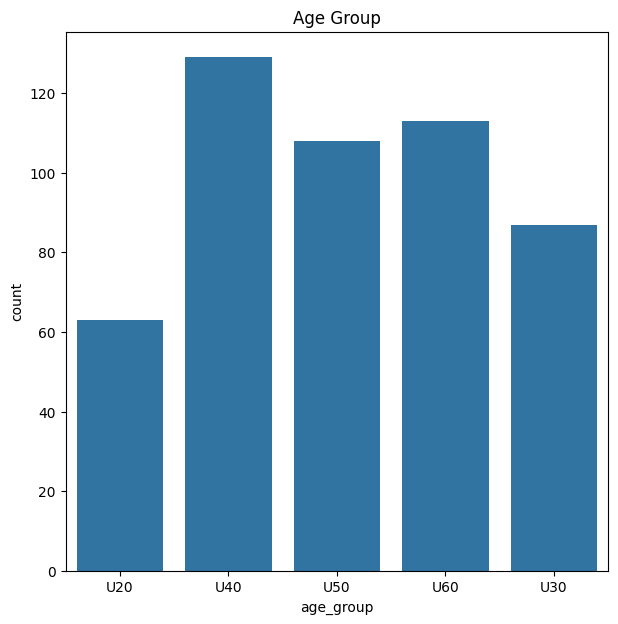

In [23]:
#count plot age_group
plt.figure(figsize=(7,7))
sns.countplot(data=df, x="age_group")
plt.title("Age Group")
plt.show()

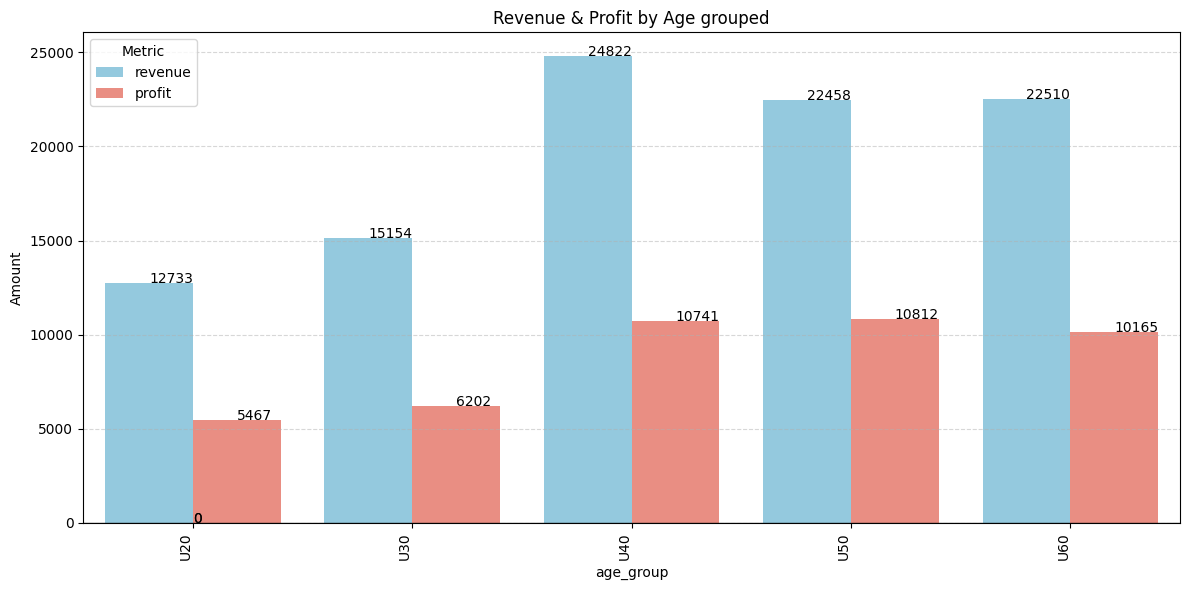

In [33]:
# revenue, profit by age_group
age_grouped = df.groupby("age_group")[["revenue","profit"]].sum().reset_index()
# Chuyển dữ liệu sang dạng long
df_age_grouped = age_grouped.melt(id_vars="age_group", value_vars=["revenue", "profit"],
                              var_name="Metric", value_name="Amount")
plt.figure(figsize=(12,6))
sns.barplot(data=df_age_grouped, x="age_group", y="Amount", hue="Metric", palette=["skyblue", "salmon"])
plt.xticks(rotation=90, ha='right')
# Thêm chú thích cho từng cột
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height())),
plt.title("Revenue & Profit by Age grouped")
plt.ylabel("Amount")
plt.tight_layout()
plt.axhline(0, color='black', linewidth=0.9)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

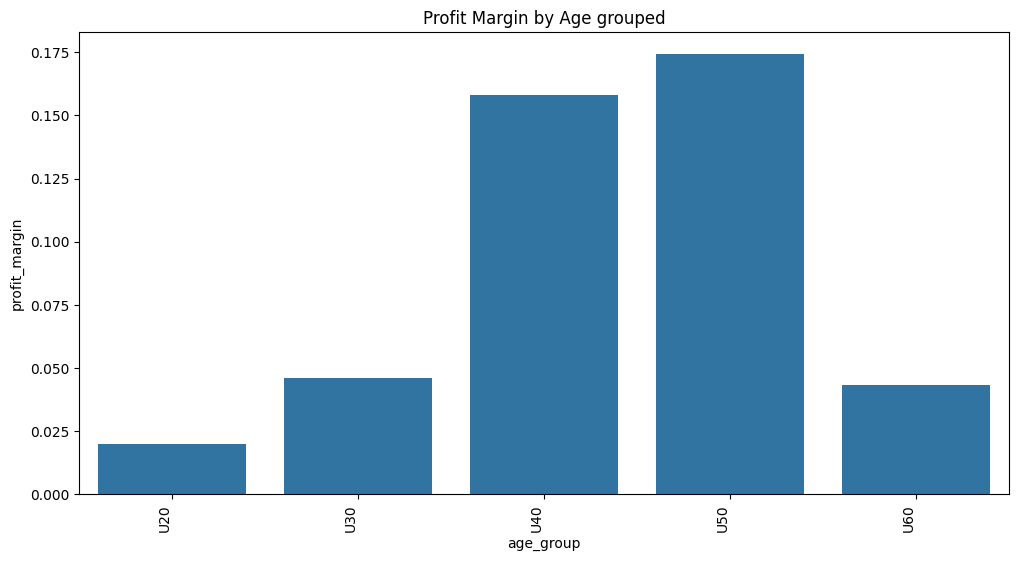

In [41]:
# profit margin by age
age_grouped = df.groupby("age_group")["profit_margin"].mean().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=age_grouped, x="age_group", y="profit_margin")
plt.xticks(rotation=90, ha='right')
plt.title("Profit Margin by Age grouped")
plt.show()

In [40]:
# @title Nhận xét:
# - Khách hàng chủ yếu thuộc nhóm tuổi U40 - U60, trong đó U40 chiếm tỷ trọng lớn nhất.
# - Nhóm U40 - U60 là nhóm mang lại doanh thu lớn nhất nhưng biên lợi nhuận tốt chỉ có U40 - U50. U60 tuy doanh số và lợi nhuận thuộc TOP nhưng biên lợi nhuận không cao.

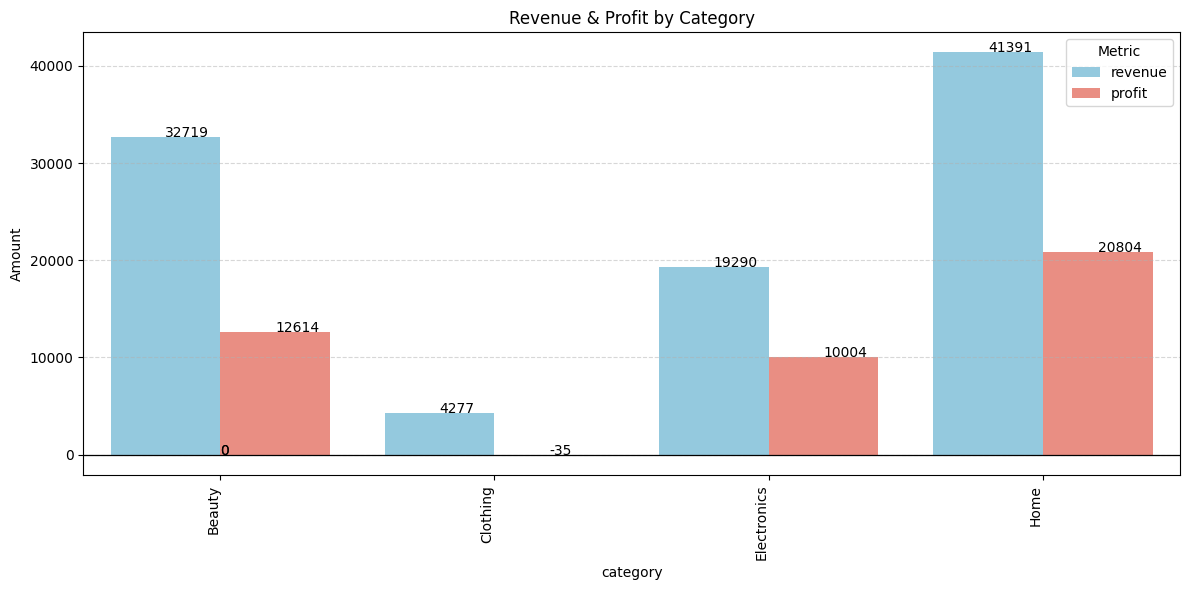

In [42]:
# revenue, profit by category
category = df.groupby("category")[["revenue","profit"]].sum().reset_index()
# Chuyển dữ liệu sang dạng long
df_category = category.melt(id_vars="category", value_vars=["revenue", "profit"],
                              var_name="Metric", value_name="Amount")
plt.figure(figsize=(12,6))
sns.barplot(data=df_category, x="category", y="Amount", hue="Metric", palette=["skyblue", "salmon"])
plt.xticks(rotation=90, ha='right')
# Thêm chú thích cho từng cột
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height())),
plt.title("Revenue & Profit by Category")
plt.ylabel("Amount")
plt.tight_layout()
plt.axhline(0, color='black', linewidth=0.9)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

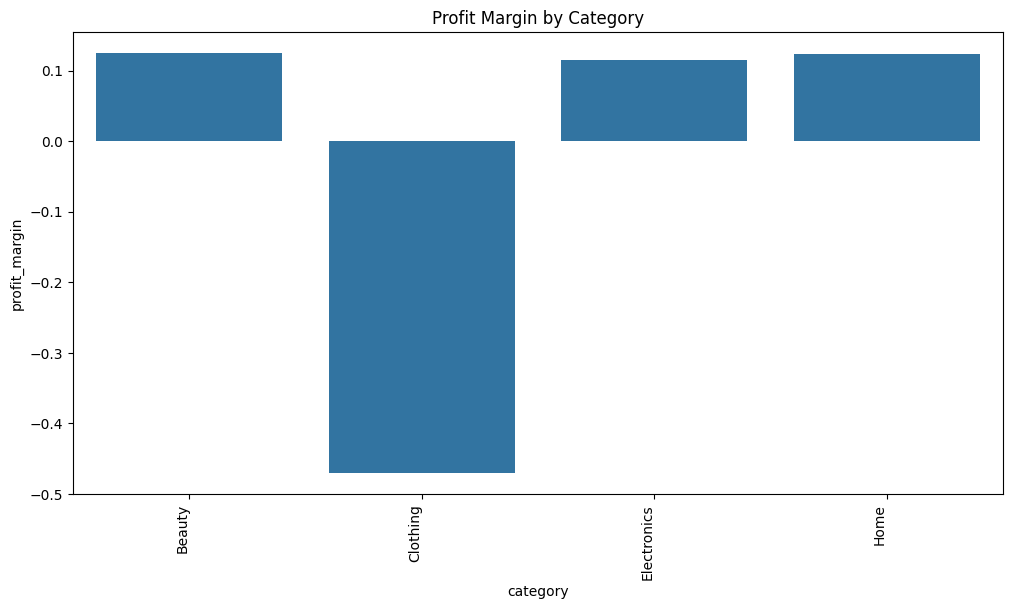

In [43]:
# profit margin category
pm_category = df.groupby("category")["profit_margin"].mean().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=pm_category, x="category", y="profit_margin")
plt.xticks(rotation=90, ha='right')
plt.title("Profit Margin by Category")
plt.show()

In [ ]:
# @title Nhận xét
# - Nhóm Clothing là nhóm lỗ và biên lợi nhuận âm -> Cần có giải pháp GẤP để cắt lỗ.
# - Nhóm Home là nhóm có doanh thu, lợi nhuận cao nhất.

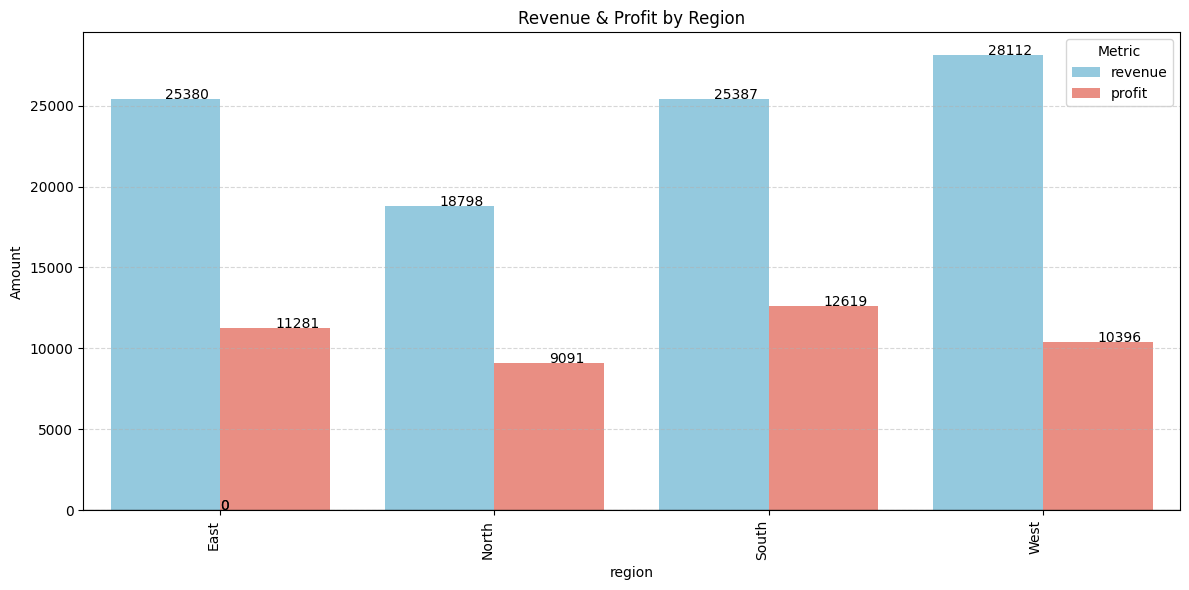

In [46]:
# revenue, profit by region
region = df.groupby("region")[["revenue","profit"]].sum().reset_index()
# Chuyển dữ liệu sang dạng long
df_region = region.melt(id_vars="region", value_vars=["revenue", "profit"],
                              var_name="Metric", value_name="Amount")
plt.figure(figsize=(12,6))
sns.barplot(data=df_region, x="region", y="Amount", hue="Metric", palette=["skyblue", "salmon"])
plt.xticks(rotation=90, ha='right')
# Thêm chú thích cho từng cột
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height())),
plt.title("Revenue & Profit by Region")
plt.ylabel("Amount")
plt.tight_layout()
plt.axhline(0, color='black', linewidth=0.9)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

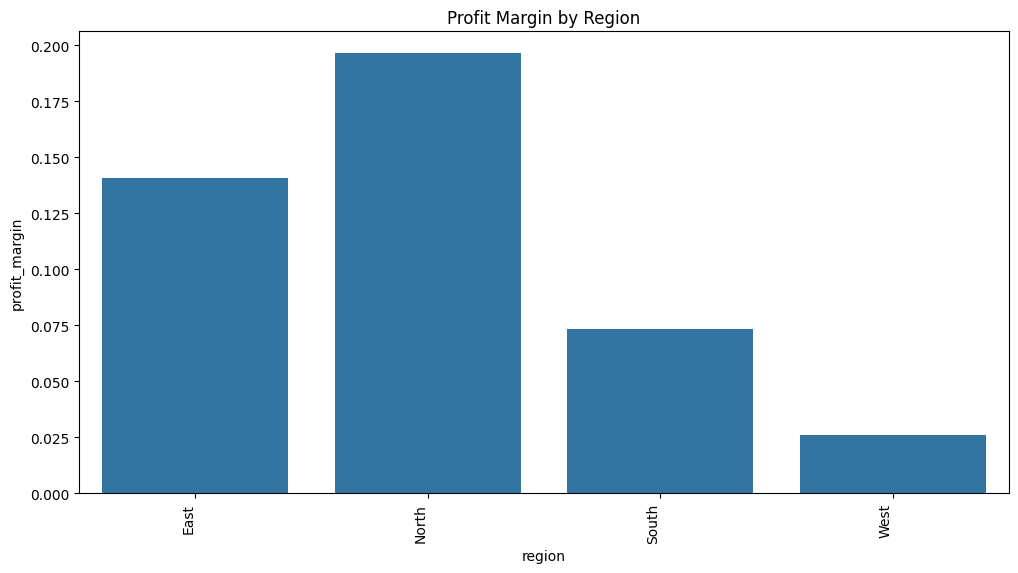

In [47]:
# profit margin by Region
pm_region = df.groupby("region")["profit_margin"].mean().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=pm_region, x="region", y="profit_margin")
plt.xticks(rotation=90, ha='right')
plt.title("Profit Margin by Region")
plt.show()

In [ ]:
# @title Nhận xét
# - Vùng West, South có doanh thu và lợi nhuận cao nhưng biên lợi nhuận thấp -> Cần tìm nguyên nhân và giải pháp cải thiện biên lợi nhuận
# - North mặc dù doanh thu và lợi nhuận thấp nhất nhưng biên lợi nhuận tốt nhất -> Có giải pháp đẩy doanh số ở vùng này.

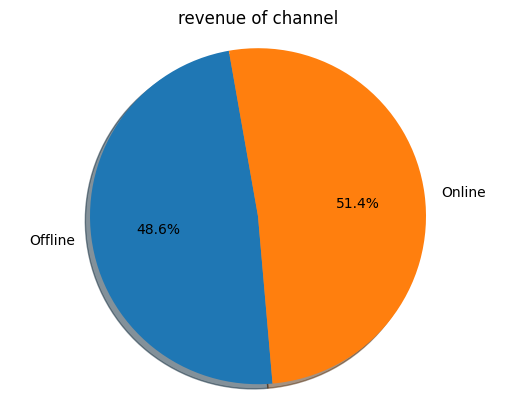

In [ ]:
#Visualization
revenue_channel = df.groupby("channel")["revenue"].sum().reset_index()
plt.pie(revenue_channel["revenue"], labels=revenue_channel["channel"],autopct='%1.1f%%', shadow=True, startangle=100)
plt.axis('equal')  # Đảm bảo biểu đồ là hình tròn
plt.title('revenue of channel')
plt.show()

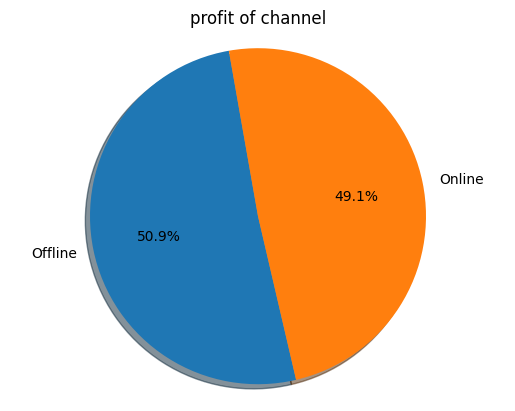

In [44]:
profit_channel = df.groupby("channel")["profit"].sum().reset_index()
plt.pie(profit_channel["profit"], labels=profit_channel["channel"],autopct='%1.1f%%', shadow=True, startangle=100)
plt.axis('equal')  # Đảm bảo biểu đồ là hình tròn
plt.title('profit of channel')
plt.show()

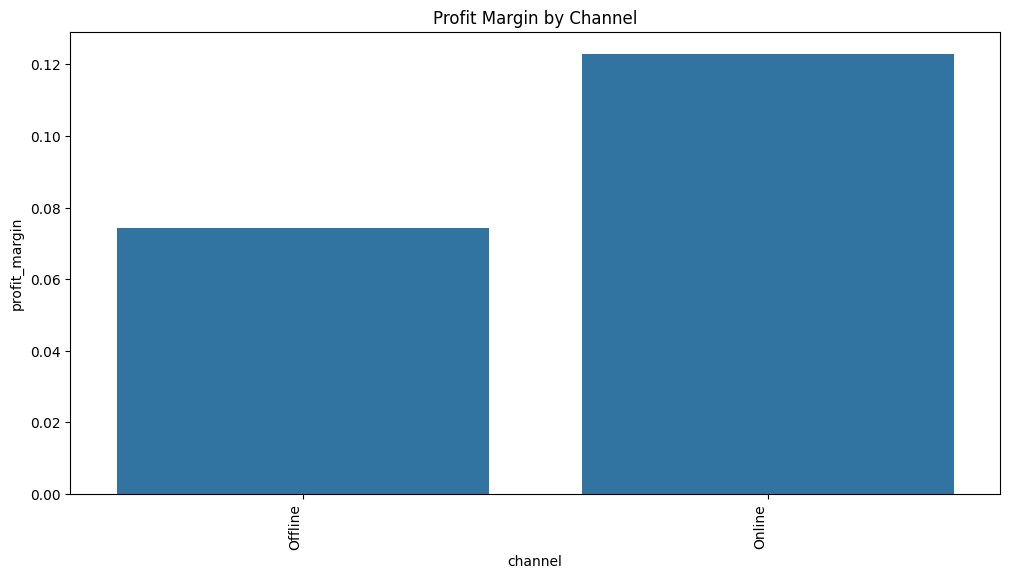

In [45]:
# profit margin by channel
pm_channel = df.groupby("channel")["profit_margin"].mean().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=pm_channel, x="channel", y="profit_margin")
plt.xticks(rotation=90, ha='right')
plt.title("Profit Margin by Channel")
plt.show()

In [ ]:
# @title Nhận xét
# - Hai kênh có doanh số và lợi nhuận chênh lệch không nhiều nhưng biên lợi nhuận của kênh Online tốt hơn.

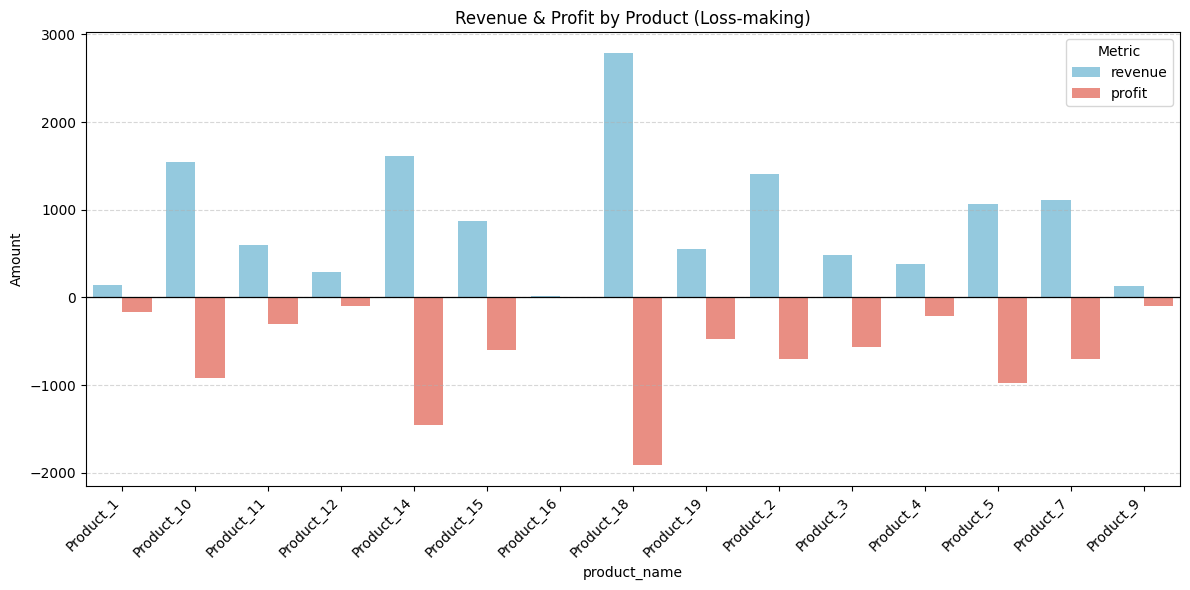

In [ ]:
#tìm sản phẩm lỗ
product_loss = df[df["profit"] < 0].groupby("product_name")[["revenue","profit"]].sum().reset_index()
# Chuyển dữ liệu sang dạng long
df_melted = product_loss.melt(id_vars="product_name", value_vars=["revenue", "profit"],
                              var_name="Metric", value_name="Amount")

plt.figure(figsize=(12,6))
sns.barplot(data=df_melted, x="product_name", y="Amount", hue="Metric", palette=["skyblue", "salmon"])
plt.xticks(rotation=45, ha='right')
plt.title("Revenue & Profit by Product (Loss-making)")
plt.ylabel("Amount")
plt.tight_layout()
plt.axhline(0, color='black', linewidth=0.9)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [ ]:
import plotly.express as px
re_products = df.groupby("product_name")["revenue"].sum().reset_index()
fig = px.treemap(
    re_products,
    path=['product_name'],
    values='revenue',
    title='Revenue by products'
)
fig.show()

In [ ]:
profit_products = df.groupby("product_name")["profit"].sum().reset_index()
fig = px.treemap(
    profit_products,
    path=['product_name'],
    values='profit',
    title='Profit by products'
)
fig.show()

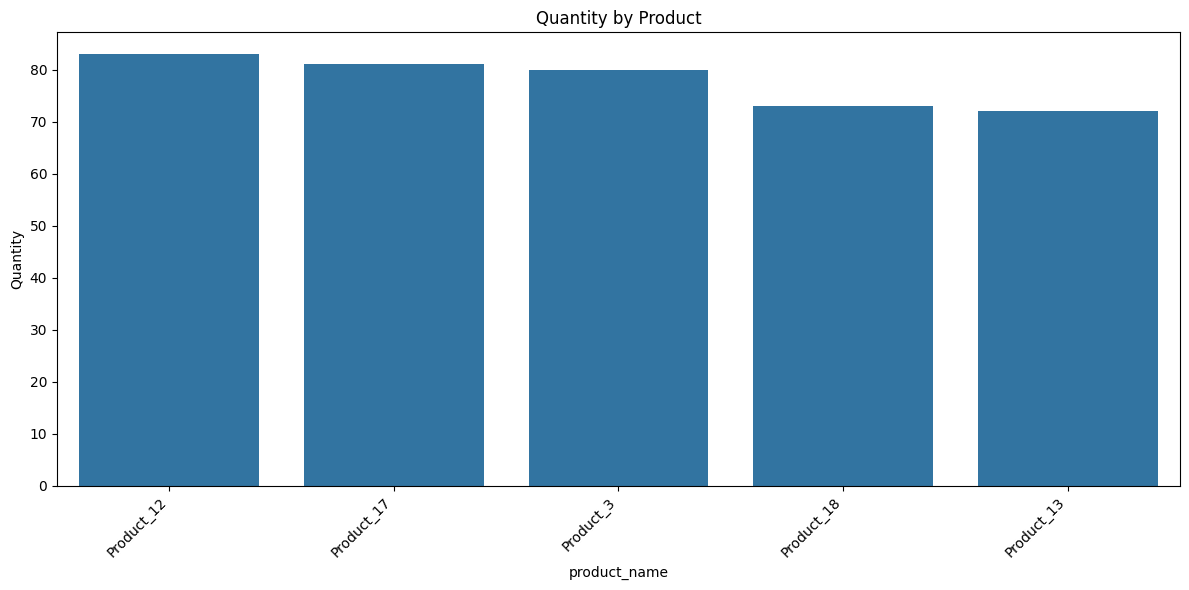

In [ ]:
quantity_products = df.groupby("product_name")["quantity"].sum().reset_index().sort_values(by="quantity", ascending=False).head(5)
plt.figure(figsize=(12,6))
sns.barplot(data=quantity_products, x="product_name", y="quantity")
plt.xticks(rotation=45, ha='right')
plt.title("Quantity by Product")
plt.ylabel("Quantity")
plt.tight_layout()
plt.show()

In [ ]:
#Top 5 sản phẩm có doanh thu cao nhất là: 17, 12, 3, 18, 13. Top5 sản phẩm lợi nhuận cao nhất là 17, 12, 13, 8, 6
# Sản phẩm 18 mặc dù có doanh thu thuộc top nhưng cũng là sản phẩm lỗ cao nhất.
#Top 5 sản phẩm bán được nhiều nhất là 12, 17, 3, 18, 13

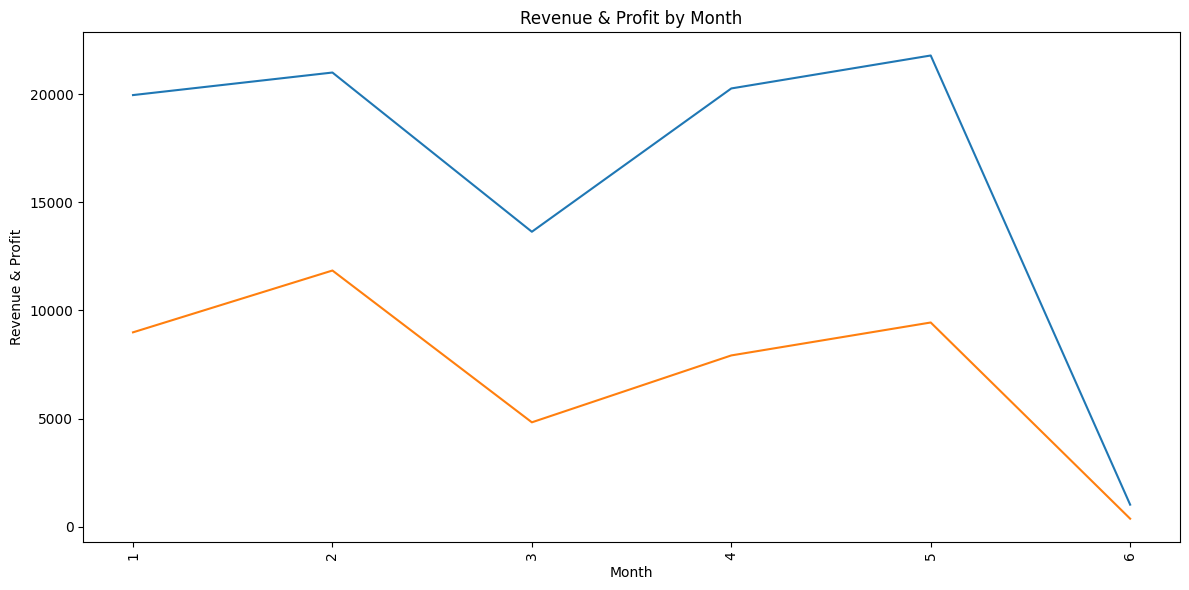

In [49]:
# @title Revenue & Profit by Month
re_month = df.groupby("month")[["revenue","profit"]].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(re_month["month"], re_month[["revenue","profit"]])
plt.xlabel("Month")
plt.ylabel("Revenue & Profit")
plt.title("Revenue & Profit by Month")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

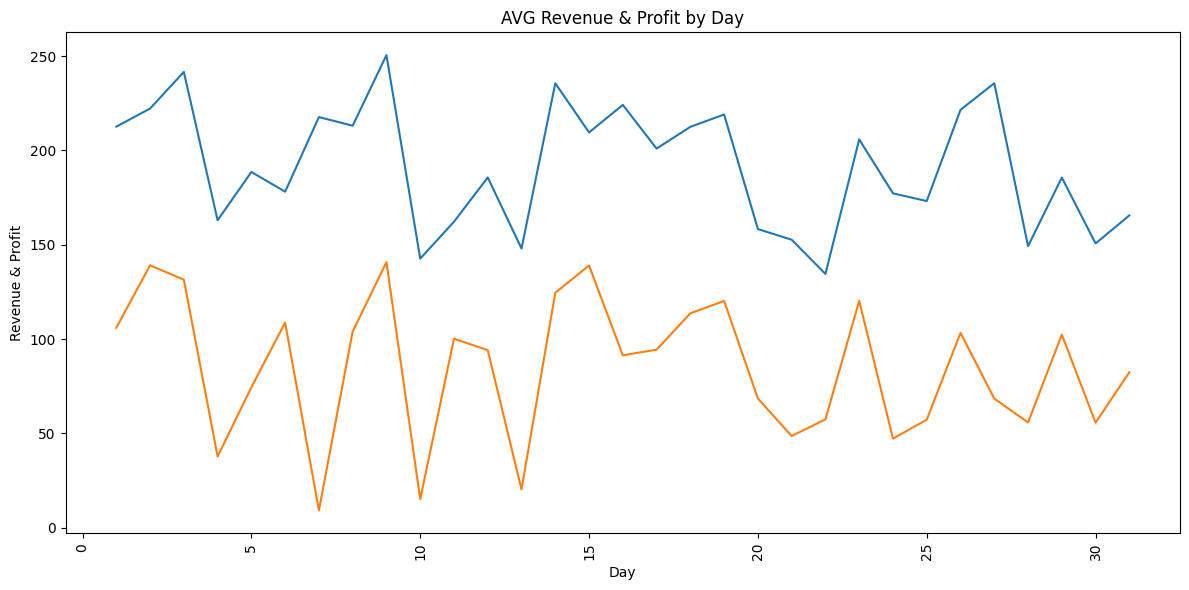

In [52]:
# AVG Revenue & Profit by Day
re_day = df.groupby("day")[["revenue","profit"]].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(re_day["day"], re_day[["revenue","profit"]])
plt.xlabel("Day")
plt.ylabel("Revenue & Profit")
plt.title("AVG Revenue & Profit by Day")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()